# Restaurant_Data_Analysis_Level_1

Project Type - EDA

Industry - Cognifyz Technologies

Contribution - Individual

Member Name - Tangudu Prabhas

Level - 1

# Task-1: Top Cuisines

Tasks to be done:
    •Determine the top three most common cuisines in the dataset.
    •Calculate the percentage of restaurants that serve each of the top cuisines


In [41]:
import pandas as pd
# Visulation libraries
import matplotlib.pyplot as plt

In [42]:
# Load the dataset
df=pd.read_csv("Dataset .csv")

In [43]:
# Dataset firstlook
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Dataset Rows & Columns count

In [44]:
print("No of rows are:",df.shape[0])
print("No of rows are:",df.shape[1])

No of rows are: 9551
No of rows are: 21


# Duplicate Values

In [45]:
dup=df.duplicated().sum()
print(f'No of Duplicate values are {dup}')

No of Duplicate values are 0


# Missing Values/Null Values

In [46]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [47]:
cuisine_data=df["Cuisines"]

In [48]:
cuisine_count=cuisine_data.value_counts()

In [49]:
# the top three most common cuisines in the dataset
top_cuisines=cuisine_count.head(3)
top_cuisines

North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: Cuisines, dtype: int64

In [50]:
# the percentage of restaurants that serve each of the top cuisines
total_res=len(df)
percentage=(top_cuisines/total_res)*100
print(percentage)

North Indian             9.800021
North Indian, Chinese    5.350225
Chinese                  3.706418
Name: Cuisines, dtype: float64


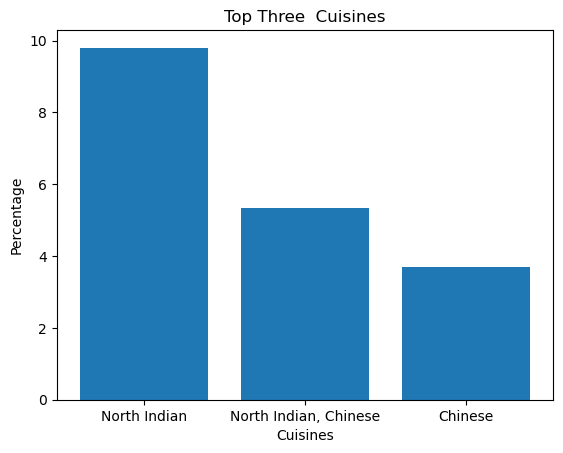

In [51]:
# Plotting using bar graph
plt.bar(percentage.index,percentage.values)
plt.xlabel("Cuisines")
plt.ylabel("Percentage")
plt.title("Top Three  Cuisines")
plt.show()

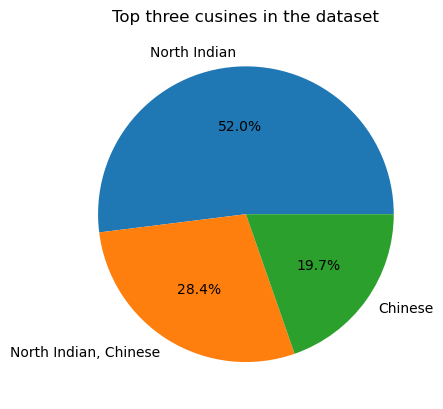

In [52]:
# Ploting using pie chart
plt.pie(top_cuisines,labels=top_cuisines.index,autopct='%1.1f%%')
plt.title("Top three cusines in the dataset")
plt.show()

# What did i found from the level 1 (task 1)?

• The Restuarant dataset consists of various restuarants information of different cities. Includes information such as restaurant name, city, address, locality, cuisines, rating and price range, among other things.
•There are 9551 rows and 21 columns provided in the data. 
•Null values are only present in cuisines; Since there are only few null values present in cuisines (only 9) i will remove them from the data. 
•The Top Three Cuisines are North Indian & North Indian,Chinese & Chinese


# Task 2: City Analysis

Tasks to be done:
    •Identify the city with the highest number of restaurants in the dataset.
    •Calculate the average rating for restaurants in each city.
    •Determine the city with the highest average rating.


In [53]:
# the city with the highest number of restaurants in the dataset
res_count=df.groupby('City')['Restaurant ID'].count()
city_with_highest_restaurants=res_count.idxmax()
print("City with highest numbeer of resturants is :",city_with_highest_restaurants)

City with highest numbeer of resturants is : New Delhi


In [54]:
# the average rating for restaurants in each city
avg_rating=df.groupby('City')["Aggregate rating"].mean()
avg_rating

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64

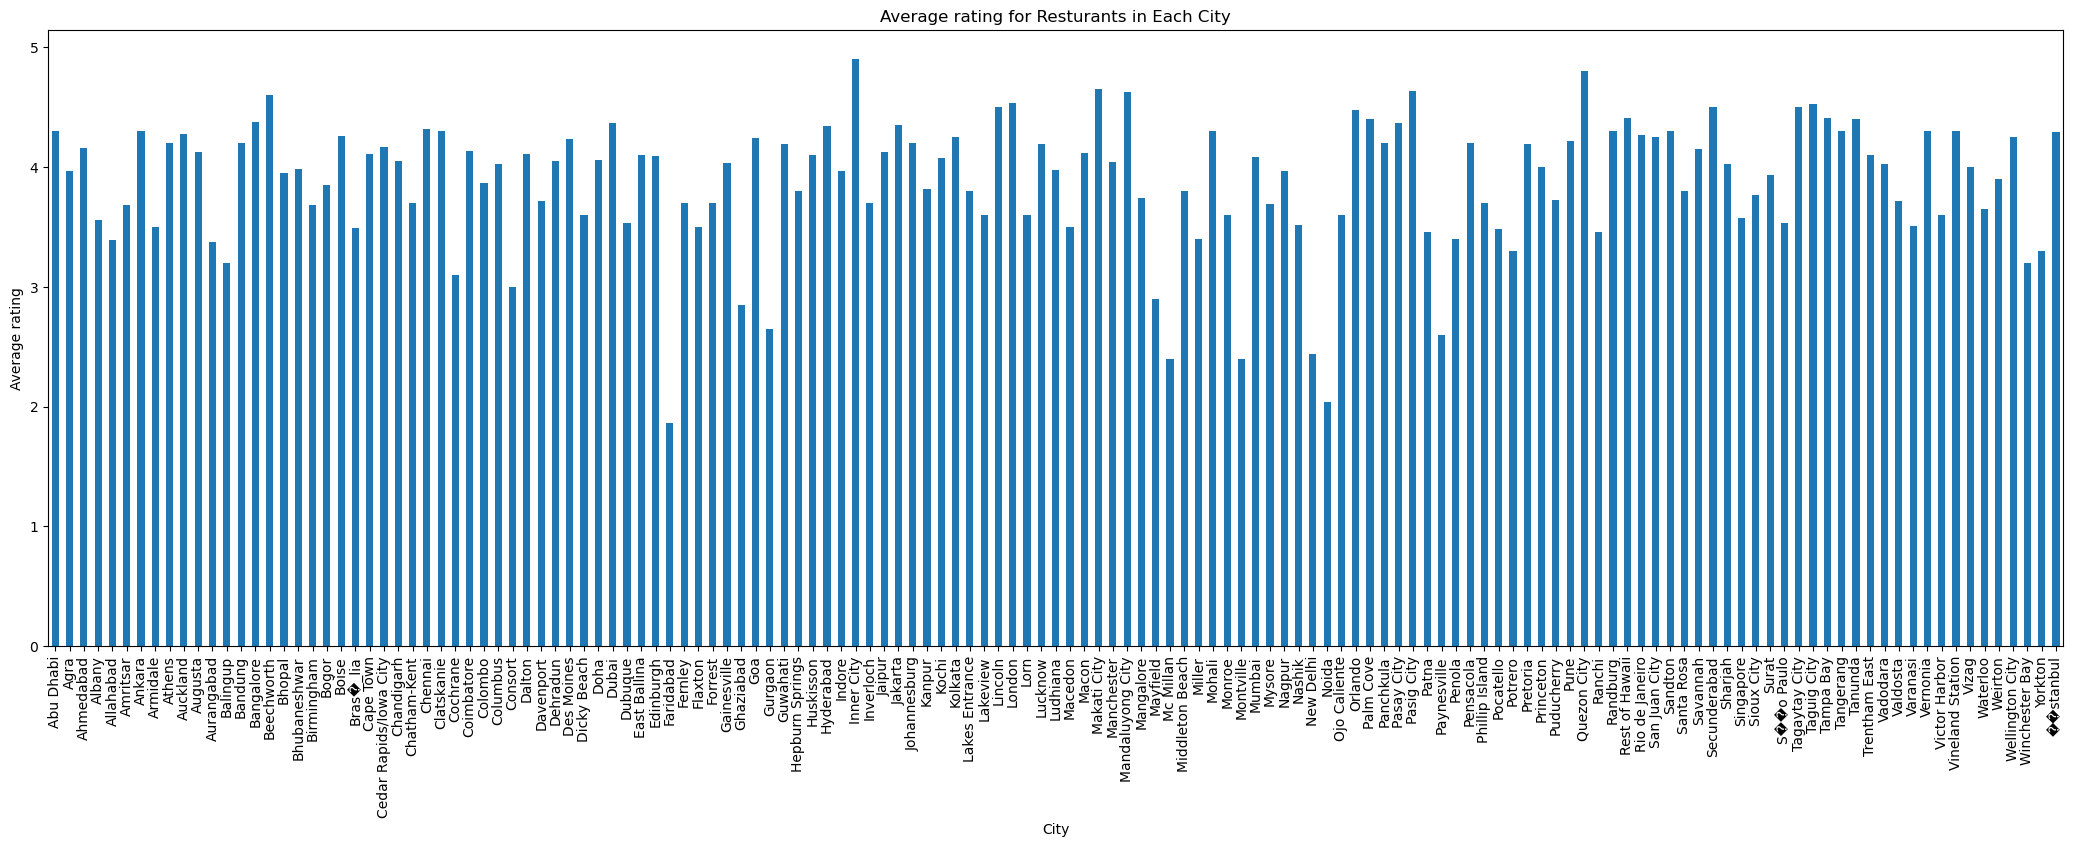

In [55]:
avg_rating.plot(kind='bar',figsize=(26,8))
plt.xlabel('City')
plt.ylabel('Average rating')
plt.title("Average rating for Resturants in Each City")
plt.show()

In [56]:
# the city with the highest average rating
city_with_highest_avg_rating=avg_rating.idxmax()
print("City with highest avgerage rating is:",city_with_highest_avg_rating)

City with highest avgerage rating is: Inner City


# What did i found from the level 1 (task 2)?

•The city with the highest number of restaurants in the dataset is New Delhi.
•The city with the highest average rating is Inner City.

# Task-3: Price Range Distribution

Tasks to be done:
    •Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.
    •Calculate the percentage of restaurants in each price range category


In [57]:
price_range_counts=df['Price range'].value_counts().sort_index()

In [58]:
percentage_per_price_range=(price_range_counts/total_res)*100
percentage_per_price_range


1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: Price range, dtype: float64

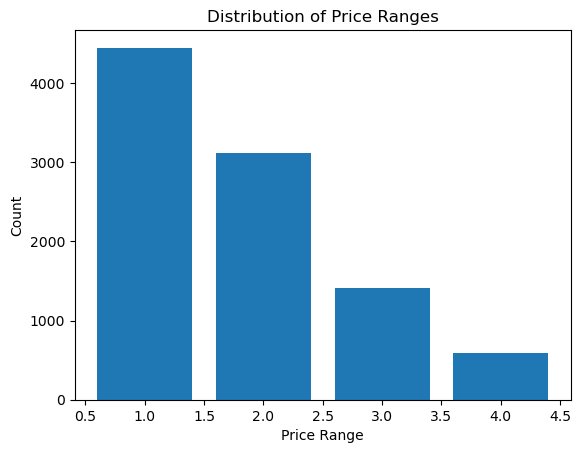

In [59]:
plt.bar(price_range_counts.index,price_range_counts.values)
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.title("Distribution of Price Ranges")
plt.show()

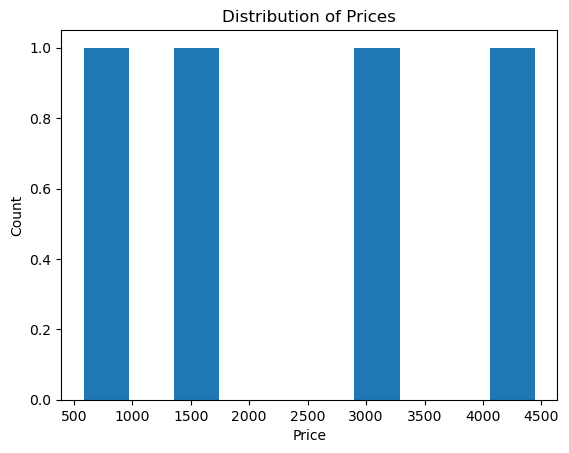

In [61]:
plt.hist(price_range_counts, bins=10)  # You can adjust the number of bins as needed
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Distribution of Prices")
plt.show()

# Task-4: Online Delivery

Tasks to be done:
    •Determine the percentage of restaurants that offer online delivery.
    •Compare the average ratings of restaurants with and without online delivery


In [62]:
res_with_online_delivery=df['Has Online delivery'].value_counts().get('Yes',0)
per_with_online_delivery=(res_with_online_delivery/total_res)*100

In [63]:
print("Percentage of restaurants that offer online delivery :",per_with_online_delivery)

Percentage of restaurants that offer online delivery : 25.662234321013504


In [64]:
avg_rating_with_online_delivery=df[df['Has Online delivery']=='Yes']['Aggregate rating'].mean()
avg_rating_without_online_delivery=df[df['Has Online delivery']=='No']['Aggregate rating'].mean()

In [65]:
print("Average rating of Resturants with Online Delivery :",avg_rating_with_online_delivery)
print("Average rating of Resturants without Online Delivery :",avg_rating_without_online_delivery)

Average rating of Resturants with Online Delivery : 3.2488372093023257
Average rating of Resturants without Online Delivery : 2.465295774647887


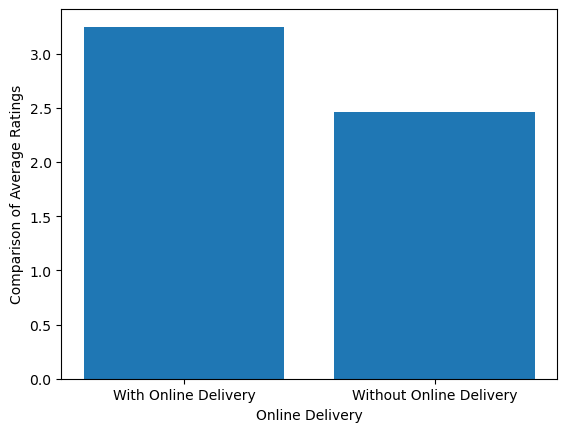

In [67]:
labels=['With Online Delivery','Without Online Delivery']
avg_ratings=[avg_rating_with_online_delivery,avg_rating_without_online_delivery]

plt.bar(labels,avg_ratings)
plt.xlabel("Online Delivery")
plt.ylabel("Comparison of Average Ratings")
plt.show()

# What did i found from the level 1 (task 4)?

•	The Percentage of restaurants that offer online delivery is 25.662234321013504
•	The Average rating of Restaurants with Online Delivery is more than the  Average rating of Restaurants without Online Delivery
